## Quick Jupyter Notebook guide

Use **Arrow keys** to move up and down
***

Use **Enter** to activate cell and **ESC** to deactivate it
***

Use **CTRL+Enter** to execute cell (interpret Markdown or Python code)
***

While cell is deactivated (you are in Command mode) use **M** to turn cell into Markdown or **Y** to switch to Python
___

**a** adds cell above and **b** adds cell below (**ALT+Enter** execute and insert below)
___

Delete cell using **dd**
___

More shortcuts will pop up after pressing **H**

## Markdown guide

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

# Introduction to ML Workflow and Data Retrieval in Julia

## Setting up the project (environment) in Julia

Before proceeding to topics related to machine learning and data analysis, let's begin with general software engineering idea - **environments**. It's a best practice to prepare isolated project for every programming initiative, whether it is building a web application, running complex scientific simulation or training ML model.

The idea of structured project is prevalent in all programming languages, however the actual name may differ, e.g. [virtual environment](https://docs.python.org/3/library/venv.html) in Python or [build environment](https://docs.gradle.org/current/userguide/build_environment.html) in many compiled languages. The scope of information carried by the projects differ between programming languages as well, but in general they record:
* dependencies (libraries, packages) required by the project
* version of the project (see [semantic versioning](https://semver.org/))
* indication of development stage (development, test, production, etc.)
* author-related information (name, contact information, company affiliation)
* miscellaneous configurations (compiler flags, version control details, CI/CD parameters, IDE settings)

The main goals of the project are to:
* provide reproducibility and standardization (if it works on my machine, it should work on yours), 
* enable collaboration (shared projects within teams)
* supply additional information about the piece of software (date of creation, sponsoring company name, author's email)

**Environments in Julia**

In Julia the project is defined by two files: `Project.toml` and `Manifest.toml`. More information regarding both files can be found in [Pkg.jl documentation](https://pkgdocs.julialang.org/v1/toml-files/).

For example, below extract from DataFrames.jl `Project.toml` contains name of the package, it's unique identifier, current version and one dependency on `DataAPI` package with additional version restriction:

```julia
name = "DataFrames"
uuid = "a93c6f00-e57d-5684-b7b6-d8193f3e46c0"
version = "1.4.1"

[deps]
DataAPI = "9a962f9c-6df0-11e9-0e5d-c546b8b5ee8a"
(...)

[compat]
DataAPI = "1.12.0"
(...)
```

**Starting new project** 

You can start your own project in a current working directory by running the following code in the Julia REPL:
```julia
using Pkg
Pkg.activate(".")
```
or hit `]` which will start Pkg REPL, then run:
```julia
activate .
```
More information on project initiation is available again in [Pkg.jl documentation](https://pkgdocs.julialang.org/v1/environments/)

**Adding packages**

While in Pkg REPL mode, add all required packages (dependencies) to the project using the `add` command:
```julia
add DataFrames, JSON, Plots
```
Alternatively run in Julia REPL:
```julia
Pkg.add(["DataFrames", "JSON", "Plots"])
```

**Recreating the project**

After finishing the work you can share the notebook or Julia scripts (and corresponding TOML files). The users may replicate the environment by running the following commands in the folder with `Project.toml` present:
```julia
$ julia --project
julia> using Pkg
julia> Pkg.instantiate()
```
Note that if you are using the Jupyter Notebook, the project is activated automatically if the `Project.toml` is present in the notebook's directory - see [IJulia documentation](https://julialang.github.io/IJulia.jl/stable/manual/usage/#Julia-projects) for details.

The `instantiate()` function will trigger the packages download and precompilation. After the process is finished, user will be able to run the code without interference and errors related to compatibility or missing libraries.

Having said that, you should have already used the `instantiate()` function while [setting up the course](https://github.com/KrainskiL/JuliaDataScienceTutorial#readme) to make your experience in upcoming exercises smooth and pleasant.

## Machine Learning workflow

![](Class1_ML_Workflow.png)
<div style="text-align: right">Source: Burkov Andriy, ML Engineering, 2020, CC BY-SA 4.0</div> 

Lifecycle of Machine Learning project is a complex process involving multiple areas of expertise and set of skills. To succeed with an enterprise-level ML project, we'll need:
* project managers, product owners and business analysts with good understanding of business problem and ability to define the goal and manage the execution of the initiative
* data engineers, data analysts and data scientists with in-depth knowledge about the data, technical skills and statistical (modelling) expertise
* DevOps engineers, software engineers, application developers taking care of model deployment in secure, robust and performant manner, often with embedment into a bigger application

Increasing penetration of ML models in the business and advancements in the deployment areas created a new area of **Machine Learning engineering** and corresponding position of **Machine Learning engineer**. Activities related to post-evaluation steps are also often reffered to as **MLOps (Machine Learning Operations)**, similarly to operations term used for ongoing maintanance and monitoring of software applications.

___
We'll cover several elements of the process in the notebooks throught the course, focusing mainly on the steps from Data collection up to Model evaluation. The final notebooks will cover basics of the deployment and serving topics.

Let's start with the first step in the ML journey - obtaining and loading data.

## Data Gathering  and Retrieval

Build a machine learning model is a data-heavy exercise and often the success of the whole project may be determined by quality and quantity of data. As for the former, the famous saying 'garbage-in, garbage-out' says it all - data may be cleaned and preprocessed, but there is hardly anything to be done if the inherent information carried by the dataset is weak (e.g. non-related features) or scarce (e.g. many missing values).

There is abandunace of data sources and formats eligible for usage in ML process. Data can be categorized based on the presence (or lack) of structure into:
* **structured data** (fixed schema, often identified with tabular datasets)
* **semi-structured data** (varying schema between observations, usually stored in JSON or XML format)
* **unstructured data** (domain-specific data without exposed features, e.g. text, music, images)

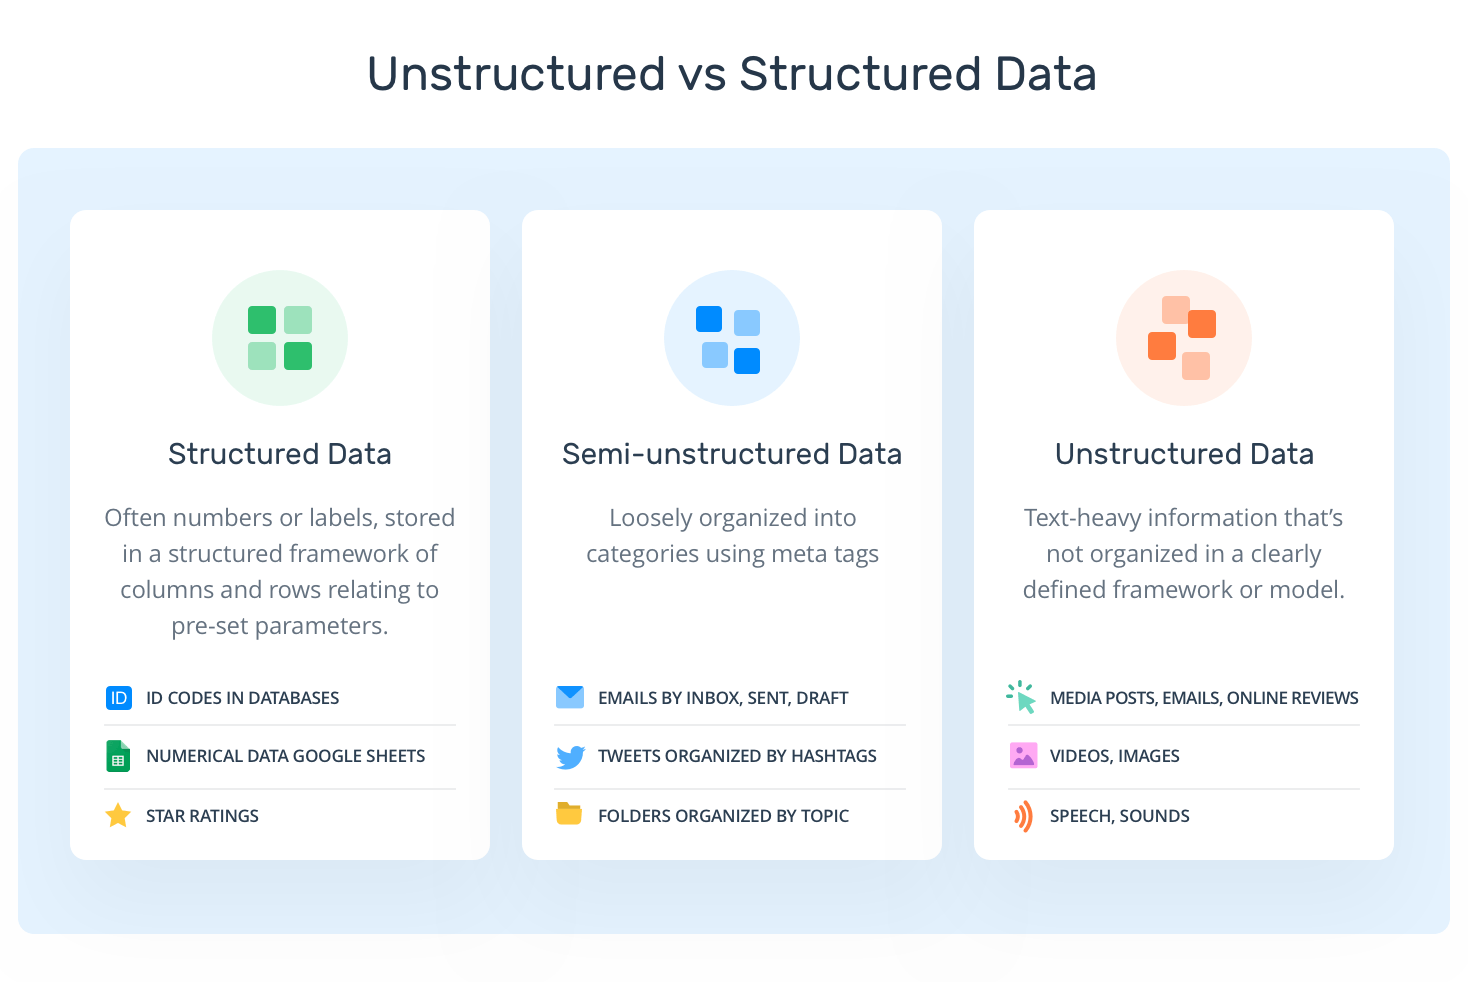

(This example is not very good so additionally I have provided another illustration after)

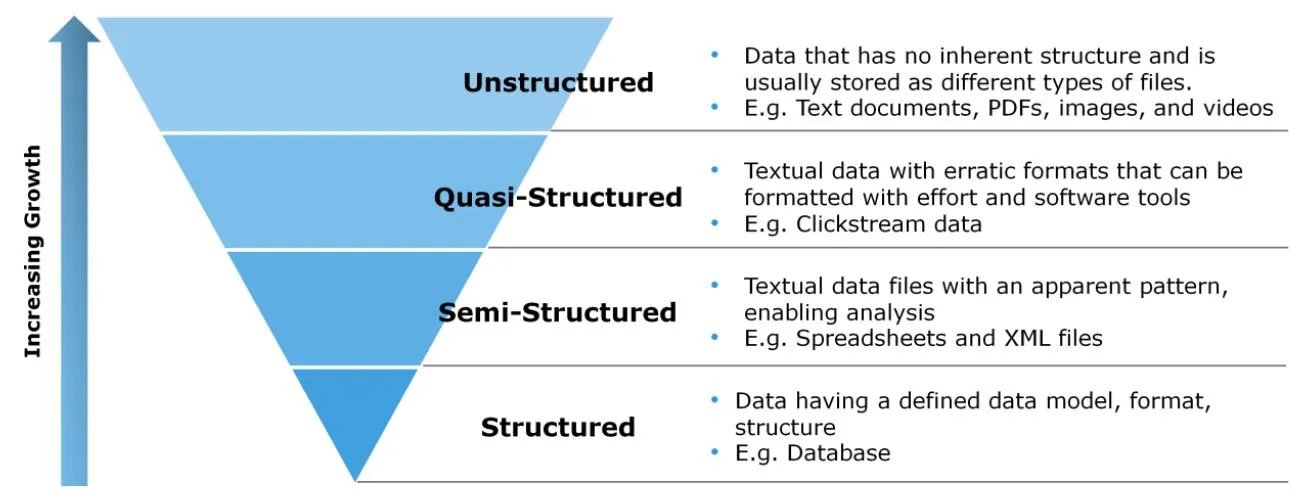

Affiliation with one of the categories above translates into available ML tasks, e.g. regression and classification is usually considered for structured data, object detection is task specific to computer vision, while sentiment analysis will be applied on text data containing natural language.

___
Another factor to consider when thinking about the data is it's source. Majority of small scale or Proof-of-Concept projects are based on the **flat files** available in online repositories - either ones specialized for modelling purposes (e.g. [UCI](https://archive.ics.uci.edu/ml/index.php)) or more general like GitHub. Government agencies also tend to share cyclic reports online in flat files (e.g. [OECD](https://data.oecd.org/)).

For medium and large ML initiatives more suitable source of data would be a **database**, **data warehouse** or **data lake**. Relational databases usually deliver structured data, however modern solutions support semi-structured and unstructured data as well (see [JSON support in PostgreSQL](https://www.postgresql.org/docs/current/datatype-json.html) for example). For big volumes of historical structured data a data warehouse is a common solution, while data lake support all three structure categories. 

Data source commonly connected with semi-structured data is a **REST API**. It's a service that can be queried through exposed URL endpoints and typically response with data in JSON format. Received records are then parsed and turned into structured data or used directly in ML models in a semi-structured form.

Public cloud platforms can also serve as  a modern data source for modelling. **Object storages** such as AWS S3 or Azure Blob Storage provide a convenient place to store and share large quantities of unstructured data.

After the short overview of sources of data and categories of data structure, let's see how we can load various datasets into Julia for further processing. We are starting by loading the required packages.  

In [56]:
using CSV
using DataFrames
using Downloads
using DuckDB
using ImageShow
using JSON
using MLDatasets
using Plots

## Flat files

We are downloading the famous [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) from UCI repository and the file with dataset description. `iris.data` is saved to `iris_data.csv` file and `iris.names` to `iris_names.txt`.

In [57]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
Downloads.download(url, "iris_data.csv")

#Explaining code in details: 
#This line is downloading a file from the URL specified by the variable url.
#The downloaded file will be saved as "iris_data.csv" in the current working directory.
#In this case, it is downloading a file from the URL 
#"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
#and saving it as "iris_data.csv". The file is likely in a CSV format.


Downloads.download(replace(url,".data" => ".names"), "iris_names.txt");

#Explaining code in details: 
#This line is downloading a file from a modified URL obtained by replacing the ".data" 
#extension in the original URL with ".names".
#The downloaded file will be saved as "iris_names.txt" in the current working directory.
#In this case, it is downloading a file from the modified URL 
#"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names" and saving it as "iris_names.txt". 
#The file is likely a text file containing names or descriptions related to the dataset.

**In summary**, these lines are downloading two different files from 
different URLs and saving them locally with specific names. 
The first line downloads a file in CSV format, while the second line downloads 
a text file with modified URL and name.

We can confirm the flat files are present in the working directory with `readdir()`.

In [58]:
readdir()

5-element Vector{String}:
 ".ipynb_checkpoints"
 "Class1_ML_Workflow.png"
 "ML Workflow and Data Retrieval.ipynb"
 "iris_data.csv"
 "iris_names.txt"

**Explaining results:** Here above are listed all files that are stored in directory with name Class 1

Now we can load the data to a DataFrame for analysis.

In [59]:
iris = CSV.read("iris_data.csv", DataFrame; 
        header=["sepal_len", "sepal_wid", "petal_len", "petal_wid", "species"])

Row,sepal_len,sepal_wid,petal_len,petal_wid,species
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


Now we can use the dataset to produce a meaningful plot or build a model.

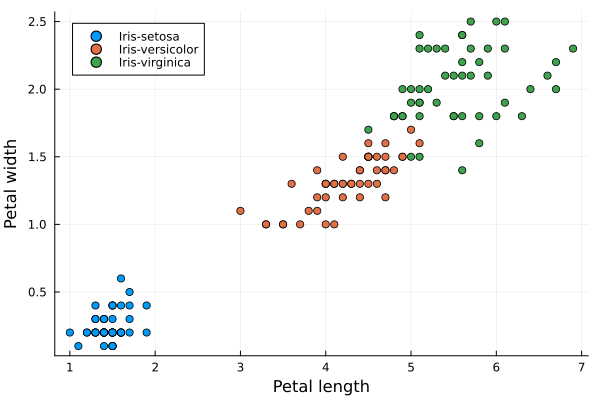

In [60]:
scatter(iris.petal_len, iris.petal_wid, group=iris.species, 
    legend=:topleft, xlab="Petal length", ylab="Petal width")

In relational databases, tabular data manipulation is done with **Structured Query Language (SQL)**. The SQL has become prevalent in data analysis and was adopted also in non-relational analytical tools. Knowledge of SQL should be considered one of the core skills of Data Analyst or Data Scientist.

In Julia SQL queries can be run on top of the DataFrame with DuckDB engine. DuckDB has API for multiple other programming languages, for instance Python or R. The tool is open-source and focuses on analytical workloads. For more details check the [DuckDB website](https://duckdb.org/).

We'll create an in-memory database with the `connect` function and register Iris DataFrame with `register_data_frame`.

In [61]:
con = DBInterface.connect(DuckDB.DB)
DuckDB.register_data_frame(con, iris, "iris")

Let's check the average of 4 numeric features for each species of iris using SQL query.

In [62]:
query = """SELECT 
species, 
AVG(sepal_len) avg_sepal_len, 
AVG(sepal_wid) avg_sepal_wid,
AVG(petal_len) avg_petal_len,
AVG(petal_wid) avg_petal_wid
FROM iris
GROUP BY species"""
results = DBInterface.execute(con, query).df


missing

In [63]:
results

missing

The result is a standard DataFrame. We can use it to plot the averages on the barplots and assess if they differ between species visually.

In [17]:
gr()
plot(
    bar(results.species, results.avg_sepal_len, title="Sepal Length", legend=false),
    bar(results.species, results.avg_sepal_wid, title="Sepal Width", legend=false),
    bar(results.species, results.avg_petal_len, title="Petal Length", legend=false),
    bar(results.species, results.avg_petal_wid, title="Petal Width", legend=false),
    layout=(2,2), size=(800, 700)
    )

LoadError: type Missing has no field species

## Interacting with an API

Let's query GitHub API for list of Julia-based repositories ranked by number of stargazers.

It's a public API, so there is no need to pass authentication information, but usually a key or username/password pair is required.

In [67]:
Downloads.download("https://api.github.com/search/repositories?q=language:julia&sort=stars", "gh_api.json");

First 300 characters of obtained JSON file are shown below. The file contains `items` array with objects representing repositories. Nested objects are also present in repositories e.g., `owner`.

In [68]:
julia_repos = read("gh_api.json", String);
first(julia_repos, 300)

"{\n  \"total_count\": 61152,\n  \"incomplete_results\": false,\n  \"items\": [\n    {\n      \"id\": 1644196,\n      \"node_id\": \"MDEwOlJlcG9zaXRvcnkxNjQ0MTk2\",\n      \"name\": \"julia\",\n      \"full_name\": \"JuliaLang/julia\",\n      \"private\": false,\n      \"owner\": {\n        \"login\": \"JuliaLang\",\n        \"id\": 743164,\n"

JSON can fit into a `DataFrame` - nested objects are loaded as `Dict` columns and arrays as `Array`.

In [69]:
repos_df = DataFrame(JSON.parse(julia_repos)["items"])
first(repos_df, 2)

Row,pulls_url,mirror_url,keys_url,html_url,comments_url,tags_url,svn_url,statuses_url,archive_url,fork,has_discussions,web_commit_signoff_required,watchers,contents_url,disabled,labels_url,open_issues,forks_count,issues_url,homepage,language,has_downloads,collaborators_url,name,deployments_url,owner,node_id,stargazers_url,updated_at,branches_url,subscribers_url,stargazers_count,notifications_url,url,score,license,compare_url,contributors_url,downloads_url,visibility,forks_url,open_issues_count,forks,hooks_url,id,git_tags_url,events_url,git_refs_url,milestones_url,full_name,default_branch,has_issues,blobs_url,git_url,ssh_url,teams_url,is_template,has_projects,merges_url,trees_url,created_at,assignees_url,languages_url,allow_forking,subscription_url,commits_url,watchers_count,archived,topics,private,description,releases_url,size,git_commits_url,has_pages,issue_events_url,issue_comment_url,pushed_at,clone_url,has_wiki
,String,Nothing,String,String,String,String,String,String,String,Bool,Bool,Bool,Int64,String,Bool,String,Int64,Int64,String,Union…,String,Bool,String,String,String,Dict…,String,String,String,String,String,Int64,String,String,Float64,Union…,String,String,String,String,String,Int64,Int64,String,Int64,String,String,String,String,String,String,Bool,String,String,String,String,Bool,Bool,String,String,String,String,String,Bool,String,String,Int64,Bool,Array…,Bool,Union…,String,Int64,String,Bool,String,String,String,String,Bool
1,https://api.github.com/repos/JuliaLang/julia/pulls{/number},,https://api.github.com/repos/JuliaLang/julia/keys{/key_id},https://github.com/JuliaLang/julia,https://api.github.com/repos/JuliaLang/julia/comments{/number},https://api.github.com/repos/JuliaLang/julia/tags,https://github.com/JuliaLang/julia,https://api.github.com/repos/JuliaLang/julia/statuses/{sha},https://api.github.com/repos/JuliaLang/julia/{archive_format}{/ref},false,true,false,42431,https://api.github.com/repos/JuliaLang/julia/contents/{+path},false,https://api.github.com/repos/JuliaLang/julia/labels{/name},4581,5198,https://api.github.com/repos/JuliaLang/julia/issues{/number},https://julialang.org/,Julia,true,https://api.github.com/repos/JuliaLang/julia/collaborators{/collaborator},julia,https://api.github.com/repos/JuliaLang/julia/deployments,"Dict{String, Any}(""repos_url""=>""https://api.github.com/users/JuliaLang/repos"", ""login""=>""JuliaLang"", ""gists_url""=>""https://api.github.com/users/JuliaLang/gists{/gist_id}"", ""site_admin""=>false, ""subscriptions_url""=>""https://api.github.com/users/JuliaLang/subscriptions"", ""id""=>743164, ""html_url""=>""https://github.com/JuliaLang"", ""node_id""=>""MDEyOk9yZ2FuaXphdGlvbjc0MzE2NA=="", ""events_url""=>""https://api.github.com/users/JuliaLang/events{/privacy}"", ""followers_url""=>""https://api.github.com/users/JuliaLang/followers""…)",MDEwOlJlcG9zaXRvcnkxNjQ0MTk2,https://api.github.com/repos/JuliaLang/julia/stargazers,2023-05-25T00:45:12Z,https://api.github.com/repos/JuliaLang/julia/branches{/branch},https://api.github.com/repos/JuliaLang/julia/subscribers,42431,"https://api.github.com/repos/JuliaLang/julia/notifications{?since,all,participating}",https://api.github.com/repos/JuliaLang/julia,1.0,"Dict{String, Any}(""key""=>""mit"", ""name""=>""MIT License"", ""spdx_id""=>""MIT"", ""node_id""=>""MDc6TGljZW5zZTEz"", ""url""=>""https://api.github.com/licenses/mit"")",https://api.github.com/repos/JuliaLang/julia/compare/{base}...{head},https://api.github.com/repos/JuliaLang/julia/contributors,https://api.github.com/repos/JuliaLang/julia/downloads,public,https://api.github.com/repos/JuliaLang/julia/forks,4581,5198,https://api.github.com/repos/JuliaLang/julia/hooks,1644196,https://api.github.com/repos/JuliaLang/julia/git/tags{/sha},https://api.github.com/repos/JuliaLang/julia/events,https://api.github.com/repos/JuliaLang/julia/git/refs{/sha},https://api.github.com/repos/JuliaLang/julia/milestones{/number},JuliaLang/julia,master,true,https://api.github.com/repos/JuliaLang/julia/git/

After inspecting the schema we can determine which fields are of composite type.

In [70]:
show(stdout, describe(repos_df, :eltype), allrows=true)

80×2 DataFrame
 Row │ variable                     eltype                            
     │ Symbol                       Type                              
─────┼────────────────────────────────────────────────────────────────
   1 │ pulls_url                    String
   2 │ mirror_url                   Nothing
   3 │ keys_url                     String
   4 │ html_url                     String
   5 │ comments_url                 String
   6 │ tags_url                     String
   7 │ svn_url                      String
   8 │ statuses_url                 String
   9 │ archive_url                  String
  10 │ fork                         Bool
  11 │ has_discussions              Bool
  12 │ web_commit_signoff_required  Bool
  13 │ watchers                     Int64
  14 │ contents_url                 String
  15 │ disabled                     Bool
  16 │ labels_url                   String
  17 │ open_issues                  Int64
  18 │ forks_count                  Int64
  19 │ i

Let's extract the information about top 10 repositories ordered by stars count.

In [71]:
first(select(repos_df, :name, 
    :owner => ByRow(x -> x["login"]) => :owner, 
    :stargazers_count => :stars, 
    :created_at => :created, 
    :description), 10)

Row,name,owner,stars,created,description
,String,String,Int64,String,Union…
1,julia,JuliaLang,42431,2011-04-21T07:01:50Z,The Julia Programming Language
2,Pluto.jl,fonsp,4504,2020-02-23T01:50:12Z,🎈 Simple reactive notebooks for Julia
3,Flux.jl,FluxML,4130,2016-04-01T21:11:05Z,Relax! Flux is the ML library that doesn't make you tensor
4,IJulia.jl,JuliaLang,2632,2013-03-05T18:20:21Z,Julia kernel for Jupyter
5,DifferentialEquations.jl,SciML,2511,2016-05-11T05:13:39Z,"Multi-language suite for high-performance solvers of differential equations and scientific machine learning (SciML) components. Ordinary differential equations (ODEs), stochastic differential equations (SDEs), delay differential equations (DDEs), differential-algebraic equations (DAEs), and more in Julia."
6,computational-thinking,mitmath,2351,2020-08-25T15:07:05Z,"Course 18.S191 at MIT, Fall 2022 - Introduction to computational thinking with Julia"
7,Genie.jl,GenieFramework,2013,2016-02-19T09:23:20Z,🧞The highly productive Julia web framework
8,Makie.jl,MakieOrg,1983,2017-09-25T22:07:50Z,Visualizations and plotting in Julia
9,JuMP.jl,jump-dev,1960,2012-10-10T00:34:45Z,"Modeling language for Mathematical Optimization (linear, mixed-integer, conic, semidefinite, nonlinear)"


Let's create interactive barplot with `Plotly` showing top 20 repositories based on the stargazers count. `julia` itself is excluded due to high stars count compared to other repositories.

In [72]:
plotly()
n=20
data = first(repos_df[2:end,:], n)
bar(1:n, data.stargazers_count, hovertext=data.description,
    size = (900, 500), xrotation=45, legend=false, xticks=(1:n, data.name), ylab="Stars")

[ Info: Precompiling PlotlyBase [a03496cd-edff-5a9b-9e67-9cda94a718b5]
[ Info: Precompiling PlotlyKaleido [f2990250-8cf9-495f-b13a-cce12b45703c]


## Unstructured data

Data can also be obtained directly through packages. `MLDatasets` package allows to conveniently load well-known unstructured datasets, in particular from computer vision area. We'll load and inspect observations from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains preprocessed images of clothes (28x28 pixels, single color channel).

**Note** When you run the cell below for the first time, `MLDatasets` will download the archived data to your machine. Before the download commence, you will need to accept the disclaimer. Read the message and accept by typing `y` in the input box and pressing Enter.

In [73]:
fmnist = FashionMNIST(split=:test)
fmnist.features[:, :, 2]

This program has requested access to the data dependency FashionMNIST.
which is not currently installed. It can be installed automatically, and you will not see this message again.

Dataset: FashionMNIST
Authors: Han Xiao, Kashif Rasul, Roland Vollgraf
Website: https://github.com/zalandoresearch/fashion-mnist
License: MIT

[Han Xiao et al. 2017]
    Han Xiao, Kashif Rasul, and Roland Vollgraf.
    "Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms."
    arXiv:1708.07747

The files are available for download at the offical
website linked above. Note that using the data
responsibly and respecting copyright remains your
responsibility.



Do you want to download the dataset from ["http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz", "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz", "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz", "http://fashion-

28×28 Matrix{Float32}:
 0.0        0.0        0.0       …  0.0        0.0        0.0
 0.0        0.0        0.0          0.0        0.0        0.0
 0.0        0.0        0.0          0.0        0.0        0.0
 0.0        0.0        0.0          0.0        0.0        0.0
 0.0        0.0        0.0          0.509804   0.298039   0.192157
 0.0        0.0        0.0       …  0.960784   1.0        0.803922
 0.0        0.0        0.537255     0.94902    0.976471   0.772549
 0.0        0.0313726  0.937255     0.0941176  0.0862745  0.0431373
 0.0        0.470588   0.988235     0.0        0.0        0.0
 0.0        0.819608   0.952941     0.0        0.0        0.0156863
 0.0509804  0.886275   0.917647  …  0.0        0.0        0.00392157
 0.262745   0.968627   0.898039     0.0        0.0        0.00784314
 0.0        0.929412   0.933333     0.0        0.0        0.00784314
 ⋮                               ⋱  ⋮                     
 0.196078   0.968627   0.901961     0.0        0.0        0.0078

`MLDatasets` did part of our job and preprocessed binary data into a `Matrix`. Each cell contains value between 0.0 - 1.0 corresponding to the 'brightness' of the pixels in an image. There is no explicit structure in a form of named columns, hence the data is unstructured.

Function `convert2image` from the `MLDatasets` produces a nice plot unveiling the piece of clothing hidden behind the numbers.

Looks like the second observation in the dataset is a sweater with an imprint.

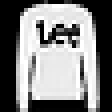

In [74]:
convert2image(fmnist, 2)

Colors can be swapped easily with broadcasting - first sample is apparently a boot.

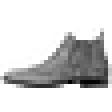

In [75]:
1 .- convert2image(fmnist, 1)